In [8]:
from lolviz import *

In [17]:
class Node:
  def __init__(self, value):
    self.value = value
    self.edges = [] # outgoing edges
  def add(self, target):
    self.edges.append(target)
  def __repr__(self): return str(self.value)

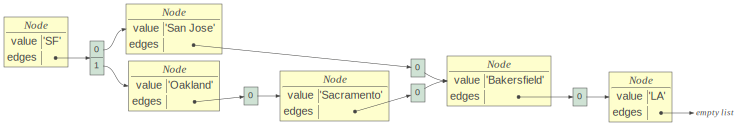

In [18]:
sf = Node("SF")
la = Node("LA")
sac = Node("Sacramento")
oak = Node("Oakland")
baker = Node("Bakersfield")
sj = Node("San Jose")
sf.add(sj)
sj.add(baker)
sf.add(oak)
oak.add(sac)
sac.add(baker)
baker.add(la)

objviz(sf)

# Reachable nodes

We need two sets, one for cycle avoidance and the other to track the nodes we reach. If we used `seen` for both, then `p` would also appear to reach itself, which might not be true.

In [26]:
def reachable(p:Node) -> set:
    reaches = set();
    reachable_(p, reaches, set())
    return reaches

def reachable_(p:Node, reaches:set, seen:set):
    if p in seen: return
    seen.add(p)
    for q in p.edges:
        reaches.add(q)
        reachable_(q, reaches, seen)

In [30]:
reachable(sf)

({Bakersfield, LA, Oakland, Sacramento, San Jose}, {Bakersfield, LA}, {LA})

In [31]:
reachable(sj)

{Bakersfield, LA}

In [32]:
reachable(baker)

{LA}

In [33]:
reachable(la)

set()

# Find path

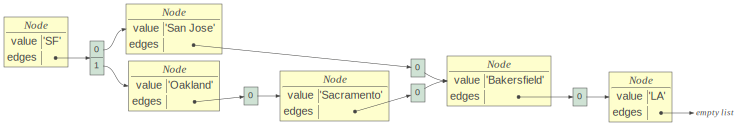

In [56]:
fresno = Node("Fresno")
fresno.add(baker)
objviz(sf)

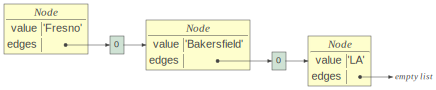

In [57]:
objviz(fresno)

In [91]:
def path(p:Node, q:Node) -> list:
    return path_(p, q, [p], set())

def path_(p:Node, q:Node, path:list, seen:set) -> list:
    if p is q: return path
    if p in seen: return None
    seen.add(p)
    for t in p.edges:
        pa = path_(t, q, path+[t], seen)
        if pa is not None: return pa
    return None

In [92]:
path(sf,la)

[SF, San Jose, Bakersfield, LA]

In [96]:
path(sf,fresno) # no path yields None

In [94]:
path(sf,sf) # node can reach itself by not traversing so path len is 1

[SF]